<a href="https://colab.research.google.com/github/gaurav199304/machine_learning_practice/blob/main/PDF_CDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("sample_data/Iris.csv")

In [ ]:
#print data-points and features.
print (iris.shape)
#150 rows
#5 columns

(150, 6)


In [ ]:
#print column names in our dataset
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
#print data points for each class (flowers for each species)
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


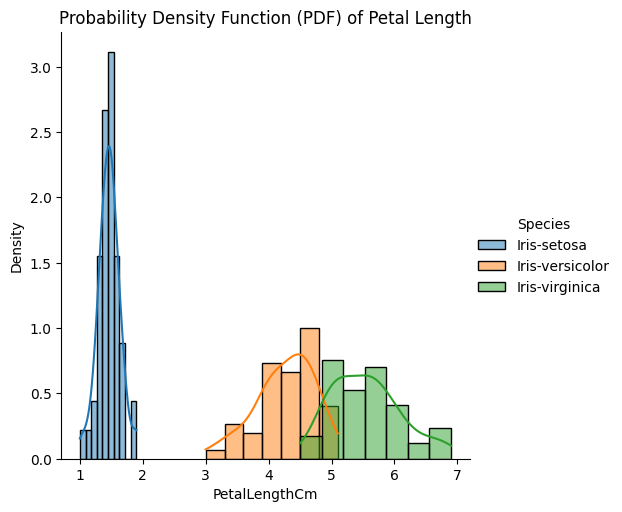

In [ ]:
# Plot the histogram with KDE (Kernel Density Estimation)
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(sns.histplot, "PetalLengthCm", kde=True, stat="density") \
   .add_legend();
plt.title("Probability Density Function (PDF) of Petal Length")
plt.show();

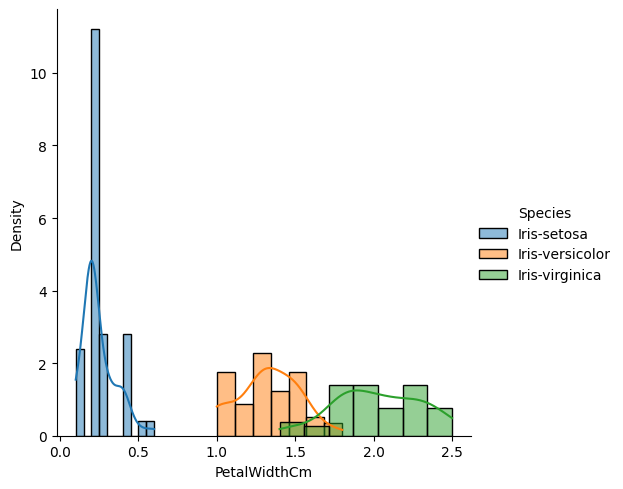

In [ ]:
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(sns.histplot, "PetalWidthCm" , kde=True, stat="density") \
   .add_legend();
plt.show();

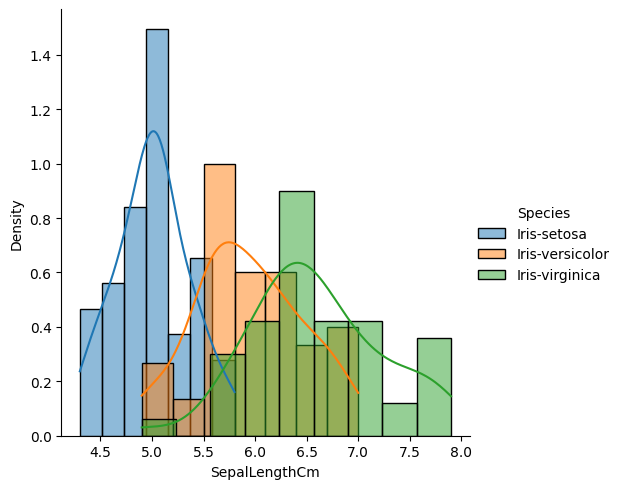

In [ ]:
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(sns.histplot, "SepalLengthCm", kde=True, stat="density") \
   .add_legend();
plt.show();

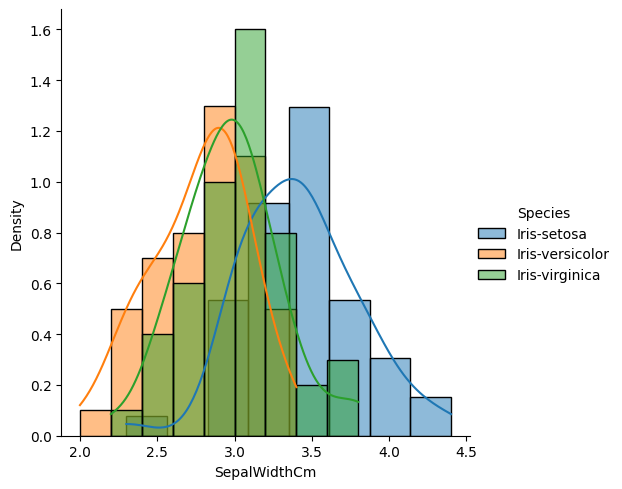

In [ ]:
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(sns.histplot, "SepalWidthCm", kde=True, stat="density") \
   .add_legend();
plt.show();

In [ ]:
#creating separate Dataframe for each flower
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"];

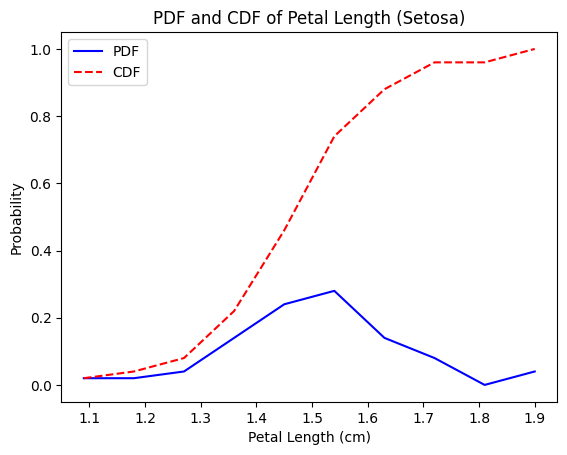

In [ ]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,  label="PDF", color="blue")
plt.plot(bin_edges[1:], cdf, label="CDF", color="red", linestyle="dashed")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Probability")
plt.title("PDF and CDF of Petal Length (Setosa)")
plt.legend()
plt.show();

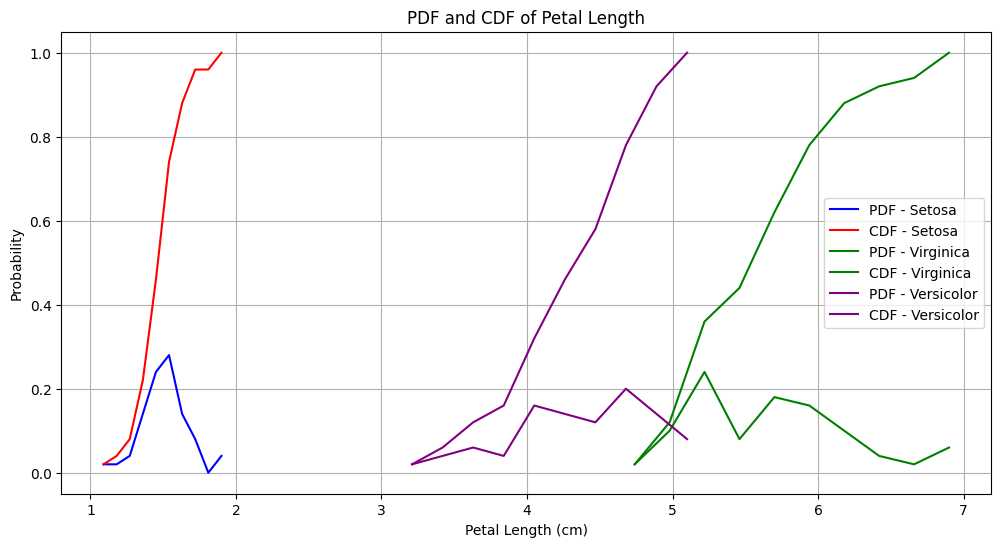

In [ ]:
# Plots of CDF of petal_length for various types of flowers.
plt.figure(figsize=(12, 6))
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf_setosa = counts / sum(counts)
cdf_setosa = np.cumsum(pdf_setosa)
plt.plot(bin_edges[1:], pdf_setosa, label="PDF - Setosa", color="blue", linestyle="-")
plt.plot(bin_edges[1:], cdf_setosa, label="CDF - Setosa", color="red", linestyle="-")

# Virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, density=True)
pdf_virginica = counts / sum(counts)
cdf_virginica = np.cumsum(pdf_virginica)
plt.plot(bin_edges[1:], pdf_virginica, label="PDF - Virginica", color="green", linestyle="-")
plt.plot(bin_edges[1:], cdf_virginica, label="CDF - Virginica", color="green", linestyle="-")

# Versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density=True)
pdf_versicolor = counts / sum(counts)
cdf_versicolor = np.cumsum(pdf_versicolor)
plt.plot(bin_edges[1:], pdf_versicolor, label="PDF - Versicolor", color="purple", linestyle="-")
plt.plot(bin_edges[1:], cdf_versicolor, label="CDF - Versicolor", color="purple", linestyle="-")

# Add labels and title
plt.xlabel("Petal Length (cm)")
plt.ylabel("Probability")
plt.title("PDF and CDF of Petal Length")

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()